<a href="https://colab.research.google.com/github/Adheena-Ajayghosh/Assignments/blob/main/project/project8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

****

About Dataset

Context

Statistics for a large number of US Colleges from the 1995 issue of US News and World Report.

Content

A data frame with 777 observations on the following 18 variables:

Private A factor with levels No and Yes indicating private or public university

Apps Number of applications received

Accept Number of applications accepted

Enroll Number of new students enrolled

Top10perc Pct. new students from top 10% of H.S. class

Top25perc Pct. new students from top 25% of H.S. class

F.Undergrad Number of fulltime undergraduates

P.Undergrad Number of parttime undergraduates

Outstate Out-of-state tuition

Room.Board Room and board costs

Books Estimated book costs

Personal Estimated personal spending

PhD Pct. of faculty with Ph.D.’s

Terminal Pct. of faculty with terminal degree

S.F.Ratio Student/faculty ratio

perc.alumni Pct. alumni who donate

Expend Instructional expenditure per student

Grad.Rate Graduation rate

Source
This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.

The dataset was used in the ASA Statistical Graphics Section’s 1995 Data Analysis Exposition.

Import Libraries
Import the libraries you usually use for data analysis

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

sns.set()

In [23]:
# Read colleges dataset
colleges = pd.read_csv('/content/College (2).csv')

In [24]:
colleges.head()   # Dataset

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


Understanding data¶

In [25]:
colleges.describe(include = 'all')

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777,777,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
unique,777,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Abilene Christian University,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,NaN,NaN,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,NaN,NaN,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,NaN,NaN,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,NaN,NaN,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,NaN,NaN,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000


In [26]:
colleges.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F.Undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  Room.Board   777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  S.F.Ratio    777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad.Rate    777 non-null    int64  
dtypes: float

Data is already cleaned,we only have to change first column name(Unnamed: 0) and data where Grad.Rate>100

In [27]:
colleges.rename(columns = {'Unnamed: 0':'cllg_name'},inplace = True)
colleges[colleges['Grad.Rate']>100]

,cllg_name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [28]:
t =  colleges.iloc[95].values
t[18] = 100
colleges.iloc[95] = t

In [29]:
colleges.head()

,cllg_name,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


**Exploratory Data Analysis**

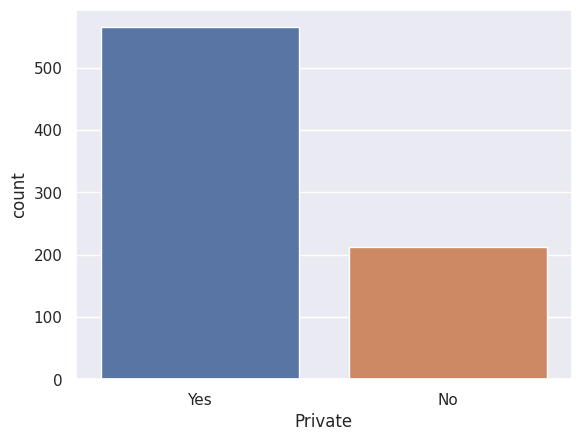

In [30]:
sns.countplot(x = 'Private',data = colleges)
plt.show()

By above graph we can say that in US private college is more than Government college

In [31]:
instution_type = colleges.groupby('Private')[['Apps','Accept','Enroll','F.Undergrad','P.Undergrad']].sum().reset_index()
instution_type['Expend'] = colleges.groupby('Private').Expend.mean().reset_index()['Expend']
st = instution_type['Enroll']
instution_type['Student_percentage'] = [st[0]/(st[0]+st[1]),st[1]/(st[0]+st[1])]
instution_type

,Private,Apps,Accept,Enroll,F.Undergrad,P.Undergrad,Expend,Student_percentage
0,No,1214743,830889,347865,1817053,419376,7458.316038,0.573998
1,Yes,1117530,737722,258174,1057775,245191,10486.353982,0.426002


There are 500+ Private colleges, whereas 200+ Government college, but in Government more no of students. so we can say that the Government colleges are crowded. Maybe one reason is expense, in private average expense is 10k while in Government is 7K

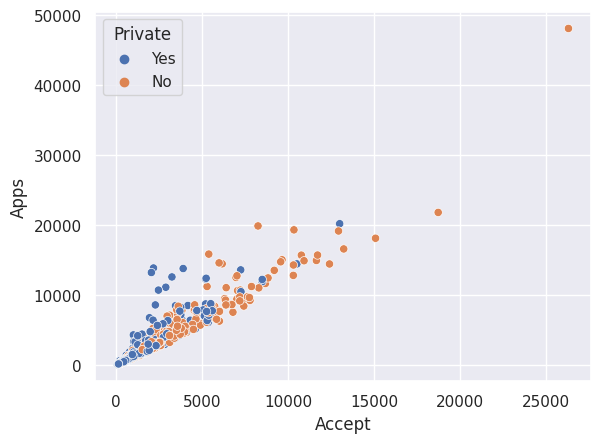

In [33]:
sns.scatterplot(x = 'Accept',y = 'Apps',data = colleges, hue = 'Private',legend = ['Private','Government'])
plt.show()

In Government there is more no of Application Accept than a Private

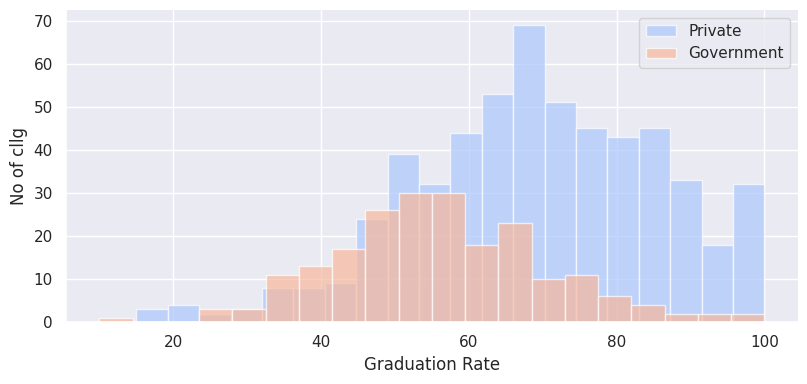

In [34]:
g = sns.FacetGrid(colleges,hue="Private",palette='coolwarm',height=4,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)
plt.xlabel('Graduation Rate')
plt.ylabel('No of cllg')
plt.legend(['Private','Government'])
plt.show()

In most Government colleges Graduation Rate is low compare to Private colleges, also if we compare with no of colleges, we see that above 70%(Graduation Rate) there are few Government colleges most of are private colleges

(0.0, 100.0)

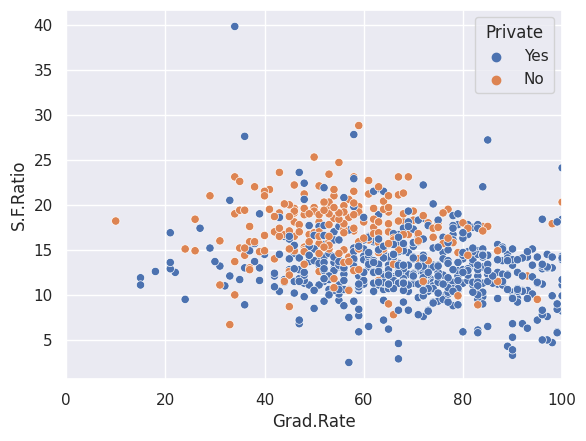

In [35]:
sns.scatterplot(x = 'Grad.Rate', y = 'S.F.Ratio',data= colleges,hue = 'Private')
plt.xlim(0,100)

Student Faculty Ratio is always higher in Government colleges which results low average Graduation Rate

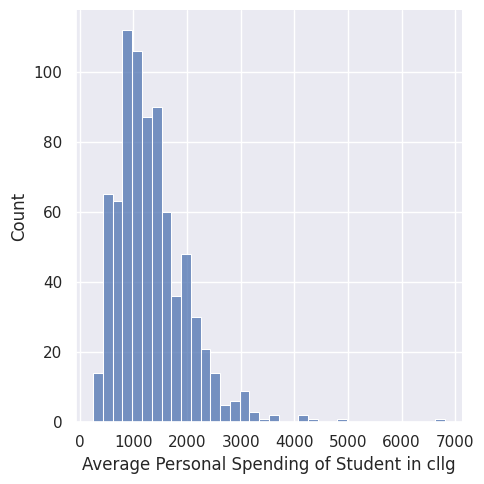

In [36]:
sns.displot(colleges['Personal'])
plt.xlabel('Average Personal Spending of Student in cllg')
plt.show()

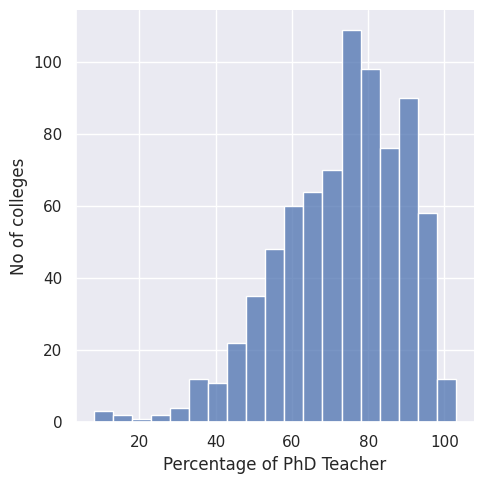

In [37]:
sns.displot(colleges['PhD'])
plt.xlabel('Percentage of PhD Teacher')
plt.ylabel('No of colleges')
plt.show()


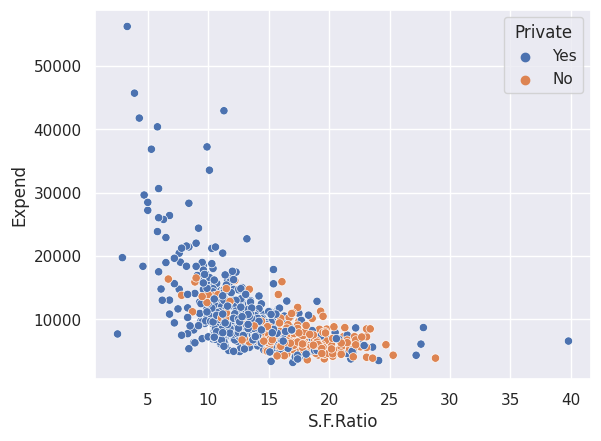

In [38]:
sns.scatterplot(x= 'S.F.Ratio',y = 'Expend' ,data = colleges,hue = 'Private')
plt.show()

**Cluster using kmeans**

In [39]:
x = colleges.drop(['cllg_name','Private','Personal'],axis = 1)

kmean = KMeans(n_clusters= 2)
kmean.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [40]:
identified_cluster = kmean.fit_predict(x)
colleges['cluster'] = identified_cluster

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


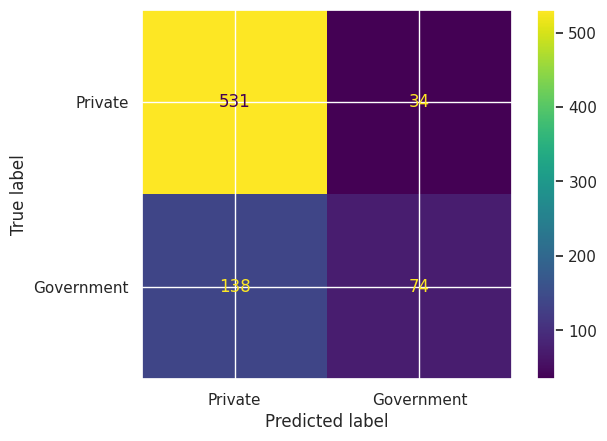

In [41]:
from sklearn import metrics
results = metrics.confusion_matrix(y_true = colleges['Private'].map({'Yes':0,'No':1}),y_pred = colleges['cluster'])
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = results,display_labels=['Private','Government'])

cm_display.plot()
plt.show()